#                                       *Climate* *Change* *Sentiment* *Analysis*



---











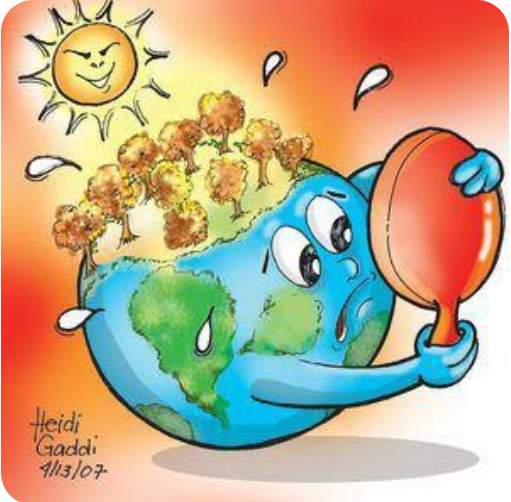

***Table of Contents***

Introduction

Install NLP Libraries

Importing the required libraries

1. Data sets

2. Preprocessing
  
  2.1. Data Description
  
  2.2. Data cleaning
  
  2.3. Visualization

3. Machine Learning
  
  3.1. Train-test split
  
  3.2. Train Models

4. Model Evaluation
  
  4.1. Model Performance

  4.2. Model Selection

5. Results and Submission

6. Conclusion

References

#**Introduction**

It is undeniable that climate change is one of the most talked topics of our times and one of the biggest challenges the world is facing today. In the past few years, we have seen a steep rise on the Earth's temperature, causing a spike in wild fires, drought, rise of sea levels due to melting glaciers, rainfall pattern shifts, flood disasters. 

While this may be true to most around the world, for one or many reasons, there are still some who are yet unphased or better yet indenial of dangers imposed by climate channge. With that being said, it is of a compelling matter to the public and its governments to engage in such a dialogue. 

Here is a document tasked to share an insight on the global climate change discussion based on data collected from Twitter. In this document we will perform a sentiment on climate change analysis to help draw an idea of what pun=blic thinks through the use of data computation and machine learning.

See below for more discription on the data and outline of this file.

*   **Data overview**


> The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected.



*   **Outline**

> In this document we will perform data analysis, build a machine learning classifier model that will be used to predict tweet sentiments based on tweets using Python programming language. 

> The following list sums up the outline of this document:
*  Basic data analysis
* Clean data
* Perform an explanatory data analysis
* Tokenize and lemmatize cleaned data
* Build models
* Perform hyperparameter tuning
* Resample data
* Perform predictions on unseen data

> It is also important to not that a Streamlit App based on this model will be built. The app will facilitate as a user-friendly plartform for users to perform sentiment predictions based on tweets and use as an on-hand climate change informative tool for users.

#**Install NLP Libraries**

The following special libraries were installed:

**spacy** is designed specifically for production use and helps build applications that process and “understand” large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

The **Natural Language Toolkit** is a suite of libraries and programs for symbolic and statistical natural language processing (NLP) for English written in the Python programming language.

In [ ]:
!pip install spacy
!pip install NLTK
!pip install comet_ml

#**Importing the required libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import sklearn
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import time

%matplotlib inline

from numpy import arange
import re           # "re", regular expression module included with Python primarily used for string searching and manipulation
                    # Also used frequently for web page "Scraping" (extract large amount of data from websites)
import os
import re, string
import spacy.cli
import nltk         # The Natural Language Toolkit

#Language libraries for text cleaning
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize

nlp = spacy.load('en_core_web_sm')

from wordcloud import WordCloud 

#Resampling libraries
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

#Machine Learning Models
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

# Packages for training models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  KFold

#Matrix measurement
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

# Model Evaluation Packages
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer
#from sklearn.metrics import recall_score, precision_recall_curve,
from collections import defaultdict


In [ ]:
nltk.download('words')
spacy.cli.download('en_core_web_sm')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')



[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Natural language Tool Kit for text processing, stopwords
stop = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())

#**1. Data sets**

*   **Importing datasets**

In [ ]:
# Importing test datasets
test = pd.read_csv('https://raw.githubusercontent.com/ThobaniMwandla/advanced_classification_zm6_project/main/data/test_with_no_labels.csv')
# Importing train datasets
train= pd.read_csv('https://raw.githubusercontent.com/ThobaniMwandla/advanced_classification_zm6_project/main/data/train.csv')

*   **View datasets**

> View the first five rows of the train data.

In [ ]:
# View train data
train.head(5)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954




> As displayed above, this data contains a lot of noise. The hashtags, @-metions, uppercase, numbers, etc, creates a lot of noise that might be distractive to our model. Therefore, this will need to be cleaned.



> View the first five rows of the test data.

In [ ]:
# View test data
test.head(5)

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928




> The same level of noise is demonstrated in the test data. Therefore, it must also be cleaned.



#**2. Preprocessing**



> Here we are preprocessing the data by first performing basic data checks such as data shape, anomalies, missing values, duplicates, datatypes, and then clean the text by removing the noise and stopwords. 

> After cleaning the data, we then tokenize and lemmatize the data text for to convert all the individual words on the text to base their base form so they can easily be grouped together and analysed as a single item.




##2.1. Data Description

* **Create copies**

> We create copies of raw data for later use on EDA. This will be used for text extractions such as hashtags and tweet handles extraction.

In [ ]:
# Preserve raw data by copying for later use
eda_train = train.copy()
eda_test = test.copy()


> As shown above, there are 15,819 rows and 3 columns in the train data; And 10,546 rows and 2 columns in the test data.




*   ***Datatype check***





> Checking and exploring the DataTypes of the dataset

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB




> As shown above, there are 15,819 rows and 3 columns (sentiment of int type, message of object type, tweetid of int type) in the train data;


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB




> And 10,546 rows and 2 columns (message of object type, tweetid of int type) in the test data.



##2.2. Data cleaning



*   ***Missing values***




> Check for missing values, if any, replace with random.


In [ ]:
print(train.isnull().sum())

sentiment    0
message      0
tweetid      0
dtype: int64


In [ ]:
print(test.isnull().sum())

message    0
tweetid    0
dtype: int64


> This confirms that there are no nulls in both the test and train datasets.



*   ***Check for duplicates***




*   ***Noise removal***

> After going through the data, it was noticed that there was noise on the 'message' column containing the tweets. 

> Therefore, the noise is removed from the tweets firstly by applying the lower-case function to all entries, and then remove urls, twitter handles with @-mentions, hashtags, white spaces, numbers and punctuation marks.





In [ ]:
def clean_text(df):
  item = 0
  for tweet in df['message']:
    tweet = tweet.lower()
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'@\S+', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = tweet.lstrip()
    tweet = tweet.rstrip()
    tweet = tweet.replace('  ', ' ')

    tweet = re.sub(r'[-]',' ', tweet)
    tweet = re.sub(r'[^\w\s]','', tweet)
    tweet = re.sub('[0-9]+', '', tweet)

    df.loc[item, 'message'] = tweet
    item += 1



> Apply the cleaning function on the train data.



In [ ]:
# Clean train data
clean_text(train)
train

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt researchers say we have three years to act ...,698562
3,1,todayinmaker wired was a pivotal year in the ...,573736
4,1,rt its and a racist sexist climate change den...,466954
...,...,...,...
15814,1,rt they took down the material on global warmi...,22001
15815,2,rt how climate change could be breaking up a m...,17856
15816,0,notiven rt nytimesworld what does trump actual...,384248
15817,-1,rt hey liberals the climate change crap is a h...,819732


> Apply the cleaning function on the test data.


In [ ]:
# Clean test data
clean_text(test)
test

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,the scary unimpeachable evidence that climate ...,224985
3,putin got to you too jill \ntrump doesnt belie...,476263
4,rt female orgasms cause global warming\nsarcas...,872928
...,...,...
10541,rt brb writing a poem about climate change cli...,895714
10542,the year climate change came home during the ...,875167
10543,rt pacific countries positive about fiji leadi...,78329
10544,rt youre so hot you must be the cause for glob...,867455



*   ***Stopwords removal***

> Stopwords are the English words which do not contribute much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have, is, they, are stopwords.

>Stopwords removal is very important when dealing with Natural Processing Language or text classification problems especially where the text is to be classified to certain categories, in this case, sentiments. 

> Hence, stopwords are excluded from the tweets in the 'messge' column so that more focus can be given to those words which define the meaning of the tweet.

In [ ]:
# Function to remove stopwords
def remove_stopwords(df):
    new_stopwords = stopwords.words('english')
    row = 0
    for tweet in df['message']:
      tweet = word_tokenize(tweet)
      tweet = [word for word in tweet if not word in new_stopwords]
      tweet = ' '.join(tweet)

      df.loc[row, 'message'] = tweet
      row += 1

    return df

> Remove stopwords from train data.

In [ ]:
# Remove stopwords on train data
remove_stopwords(train)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt researchers say three years act climate cha...,698562
3,1,todayinmaker wired pivotal year war climate ch...,573736
4,1,rt racist sexist climate change denying bigot ...,466954
...,...,...,...
15814,1,rt took material global warming lgbt rights he...,22001
15815,2,rt climate change could breaking millionyearol...,17856
15816,0,notiven rt nytimesworld trump actually believe...,384248
15817,-1,rt hey liberals climate change crap hoax ties ...,819732


> Stopwords removed from test data.

In [ ]:
# Remove stopwords on test data
remove_stopwords(test)

,message,tweetid
0,europe looking china make sure alone fighting ...,169760
1,combine polling staffers climate change womens...,35326
2,scary unimpeachable evidence climate change al...,224985
3,putin got jill trump doesnt believe climate ch...,476263
4,rt female orgasms cause global warming sarcast...,872928
...,...,...
10541,rt brb writing poem climate change climatechan...,895714
10542,year climate change came home hottest year rec...,875167
10543,rt pacific countries positive fiji leading glo...,78329
10544,rt youre hot must cause global warming aldubla...,867455


> As shown on the datframe above, words like 'is', 'are' have now been ommitted from the datasets.

*   ***Word Normalization***

> Above as mentioned, we sre more driving by the idea that more focus should be given to those words which define the meaning of the tweet for the model to be able to train more effectively.

> This brings us to what is referred to as word or text normalization. Text normalization allows us to not only reduce words to their base form but also group words of the same meaning according to the given context. This helps sharpens the classifier even more in effectively recognizing not only the context of text but also patterns, effectively improving its ability to classify categories. For example, lemmatization of of the word 'better' will output the word 'good', which helps the classifier not see the word 'better' as a different 'thing' from the word 'good', and this is one of the ways machines 'understand' English, or language.

> Here we used the Spacy 'en_core_web_sm' package to lemmatize each and every tweet by iterating through the tokenized rows in the 'message' column.

In [ ]:
# Function to lemmatize words on 'message' column
def lemmatize_tweet(df):
    df_index = 0

    for tweet in df['message']:
      tweet = nlp(tweet)
      
      for token in tweet:
        df.loc[df_index, 
               'message'] = df.loc[df_index, 
                                   'message'].replace(str(token.text),
                                                      str(token.lemma_))

      df_index += 1

      return df

In [ ]:
# Lemmatize words on 'message' column on train data
lemmatize_tweet(train)

,sentiment,message,tweetid
0,1,polyscimajor epa chief donot think carbon diox...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt researchers say three years act climate cha...,698562
3,1,todayinmaker wired pivotal year war climate ch...,573736
4,1,rt racist sexist climate change denying bigot ...,466954
...,...,...,...
15814,1,rt took material global warming lgbt rights he...,22001
15815,2,rt climate change could breaking millionyearol...,17856
15816,0,notiven rt nytimesworld trump actually believe...,384248
15817,-1,rt hey liberals climate change crap hoax ties ...,819732


In [ ]:
# Lemmatize words on 'message' column on train data
lemmatize_tweet(test)

,message,tweetid
0,europe look china make sure alone fight climat...,169760
1,combine polling staffers climate change womens...,35326
2,scary unimpeachable evidence climate change al...,224985
3,putin got jill trump doesnt believe climate ch...,476263
4,rt female orgasms cause global warming sarcast...,872928
...,...,...
10541,rt brb writing poem climate change climatechan...,895714
10542,year climate change came home hottest year rec...,875167
10543,rt pacific countries positive fiji leading glo...,78329
10544,rt youre hot must cause global warming aldubla...,867455




*   **Named entities**



> Similarly to word normalization, here we also attempt to convert words of named entities such as names of places and names of organisations, for example, to represantative or place-holder terms, such as 'LOC' and 'ORG', respectively, in this case. This further reduces noise for the classifier to effectively learn and recognise patterns. 

> We used the Spacy package to identify and replace entities in each and every tweet in the 'message' column.

In [ ]:
# Find named entities and replace with appropriate label
def entities(df):
    indx = 0

    for tweet in df['message']:
      tweet = nlp(tweet)

      for entity in tweet.ents:
        df.loc[indx, 'message'] = df.loc[indx, 
                                         'message'].replace(str(entity.text), 
                                                            str(entity.label_))

      indx += 1

      return df

In [ ]:
# Find and replace named entities with appropriate labels on train data
entities(train)

,sentiment,message,tweetid
0,1,ORG chief donot think carbon dioxide main caus...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt researchers say three years act climate cha...,698562
3,1,todayinmaker wired pivotal year war climate ch...,573736
4,1,rt racist sexist climate change denying bigot ...,466954
...,...,...,...
15814,1,rt took material global warming lgbt rights he...,22001
15815,2,rt climate change could breaking millionyearol...,17856
15816,0,notiven rt nytimesworld trump actually believe...,384248
15817,-1,rt hey liberals climate change crap hoax ties ...,819732


In [ ]:
# Find and replace named entities with appropriate labels on test data
entities(test)

,message,tweetid
0,LOC look GPE make sure alone fight climate change,169760
1,combine polling staffers climate change womens...,35326
2,scary unimpeachable evidence climate change al...,224985
3,putin got jill trump doesnt believe climate ch...,476263
4,rt female orgasms cause global warming sarcast...,872928
...,...,...
10541,rt brb writing poem climate change climatechan...,895714
10542,year climate change came home hottest year rec...,875167
10543,rt pacific countries positive fiji leading glo...,78329
10544,rt youre hot must cause global warming aldubla...,867455


##**2.3. Visualization**

>Before we start with visualisation, let's first convert the numerical representatives on the 'sentiment' column by replacing it as illustrated below:

>The tweets are divided into 4 sentiments/classes:

>[ 0 ] Neutral : Tweets that neither support nor refuse beliefs of climate change.

>[-1 ] Anti : Tweets that do not support the belief of man-made climate change.

>[ 1 ] Pro : Tweets that support the belief of man-made climate change

>[ 2 ] News : Tweets linked to factual news about climate change.

In [ ]:
# Function that converts numerical values
# on 'sentiment' to appropriate string labels
def update(df):
    sentiment = df['sentiment']
    word_sentiment = []

    for i in sentiment :
        if i == 1 :
            word_sentiment.append('Pro')
        elif i == 0 :
            word_sentiment.append('Neutral')
        elif i == -1 :
            word_sentiment.append('Anti')
        else :
            word_sentiment.append('News')

    df['sentiment'] = word_sentiment
    
    return (df)

In [ ]:
# converts numerical values
# on 'sentiment' to appropriate string labels train data copy
eda_train = update(eda_train)
eda_train.head()

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


* **Tweet distribution**

> In order to visualise the distribution of tweets, we will first check the frequency per of tweets per sentiment and then create a bargraph and pie chart to visualize the tweet distribution.

In [ ]:
# Count rows per sentiment on train data copy
eda_train.sentiment.value_counts()

Pro        8530
News       3640
Neutral    2353
Anti       1296
Name: sentiment, dtype: int64

In [ ]:
#Import matplotlib style for visuals
import matplotlib.style as style 
sns.set(font_scale=1.5)

In [ ]:
# Check avalaible visual styles
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



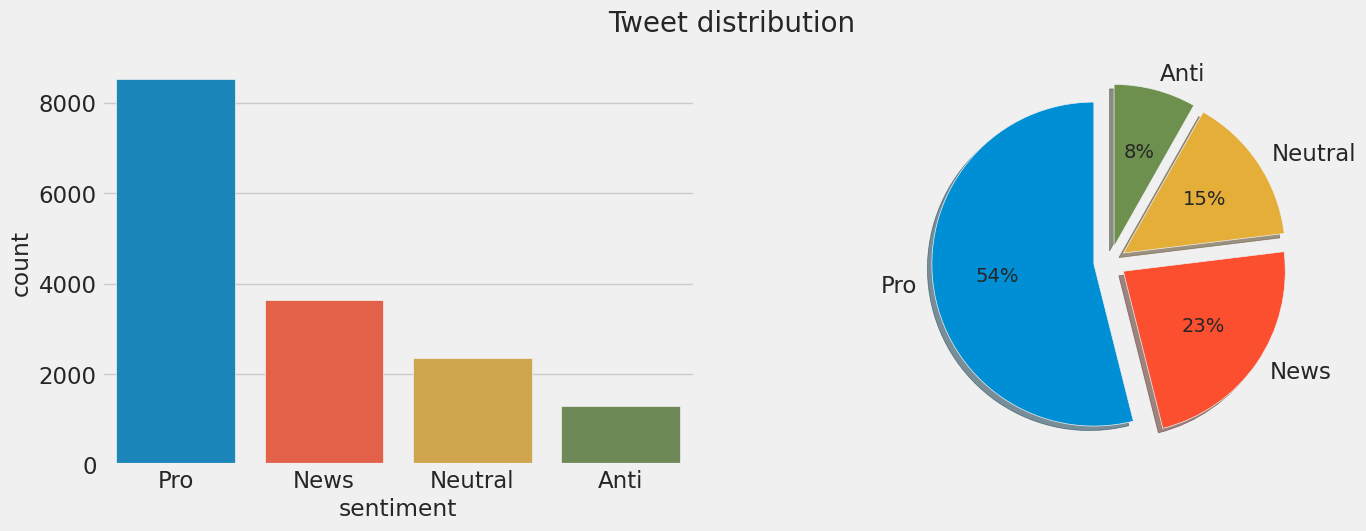

In [ ]:
style.use('fivethirtyeight')  # visual style picked

fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(15, 5), 
                         dpi=100)

sns.countplot(eda_train['sentiment'], ax=axes[0])

labels=['Pro', 'News', 'Neutral', 'Anti'] 

axes[1].pie(eda_train['sentiment'].value_counts(),
            labels=labels,
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1))

fig.suptitle('Tweet distribution', fontsize=20)
plt.show()

> According to the Tweet vs Sentiment charts, approximately 54% of the tweets on our data believe that cliamte change is real and whereas only 8% are in opposition. However, 15% of the tweets are neither negative or positive- meaning they are neutral. Appearing second after 'Pro' tweets is 'News' tweets at 23%- very indicative of the relevancy of the topic.

* **Popular words distribution**

>Demonstration of words used in different tweets under each class/sentiment.





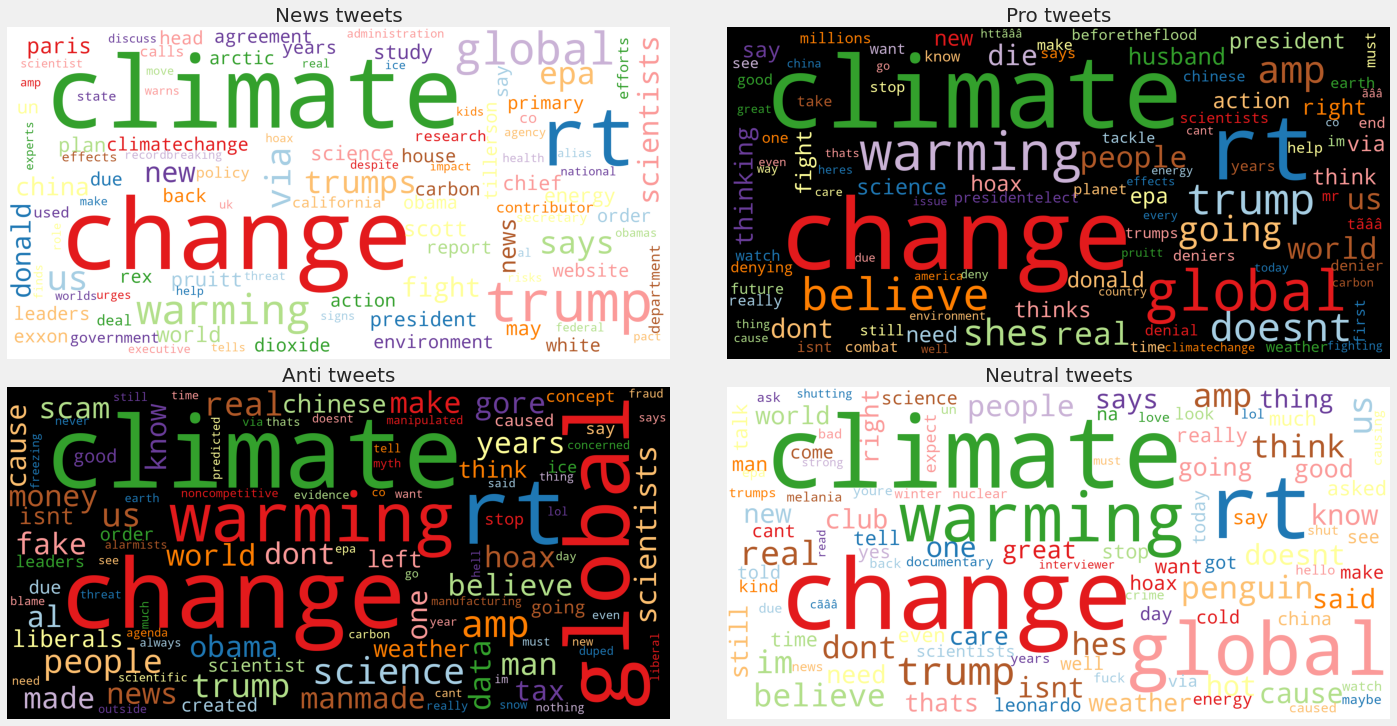

In [ ]:
# Define the different categories in the cleaned train
news = train[train['sentiment'] == 2]['message']
pro = train[train['sentiment'] == 1]['message']
neutral =train[train['sentiment'] == 0]['message']
Anti = train[train['sentiment'] == -1]['message']


news = [word for line in news for word in line.split()]
pro = [word for line in pro for word in line.split()]
neutral = [word for line in neutral for word in line.split()]
Anti= [word for line in Anti for word in line.split()]

news = WordCloud(
    background_color='black',
    max_words=100,
    max_font_size=60,
    scale=5,
    random_state=1,
    collocations=False,
    colormap ='Paired',
    normalize_plurals=False
).generate(' '.join(news))


pro = WordCloud(
    background_color='black',
    max_words=100,
    max_font_size=60,
    scale=5,
    random_state=1,
    collocations=False,
    colormap ='Paired',
    normalize_plurals=False
).generate(' '.join(pro))



neutral = WordCloud(
    background_color='black',
    max_words=100,
    max_font_size=60,
    scale=5,
    random_state=1,
    collocations=False,
    colormap='Paired',
    normalize_plurals=False
).generate(' '.join(neutral))


Anti = WordCloud(
    background_color='black',
    max_words=100,
    max_font_size=60,
    scale=5,
    random_state=1,
    collocations=False,
    colormap ='Paired',
    normalize_plurals=False
).generate(' '.join(Anti))


fig, axs = plt.subplots(2, 2, figsize = (20, 10))
fig.tight_layout(pad = 0)

axs[0, 0].imshow(news)
axs[0, 0].set_title('News tweets', fontsize = 20)
axs[0, 0].axis('off')

axs[0, 1].imshow(pro)
axs[0, 1].set_title('Pro tweets', fontsize = 20)
axs[0, 1].axis('off')


axs[1, 0].imshow(Anti)
axs[1, 0].set_title('Anti tweets', fontsize = 20)
axs[1, 0].axis('off')

axs[1, 1].imshow(neutral)
axs[1, 1].set_title('Neutral tweets', fontsize = 20)
axs[1, 1].axis('off')

plt.savefig('joint_cloud.png')

> There is quite a few one can notice, but here are some of the noticed patterns:

* The most common words used, in hierachy, across all four categories are 'climate', 'change', 'global', and then 'warming'. This is expected as the topic is centred around these words.

* Also, words like 'science' and 'scientist' are frequent- which could imply that people are tweeting about scientific studies that support their views on climate change.

* However, words such as 'hoax', 'fake', 'left' and 'scam' on ANTI tweets are more emphasized than the other categories- which is inline with the denier's sentiment.

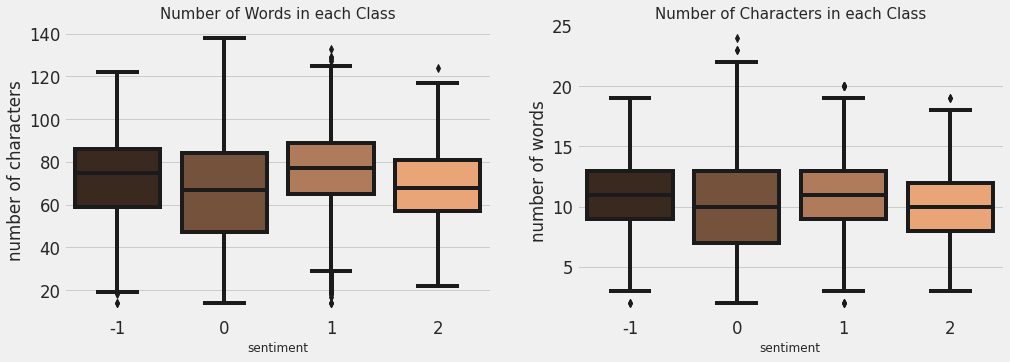

In [ ]:
# Boxplot for word count distribution
f, axes = plt.subplots(1, 2, figsize=(15,5))
# Finding Number of Characters per Tweet
train["number of characters"] = train["message"].apply(lambda x: len(str(x)))
sns.boxplot(x='sentiment', y="number of characters", data=train, ax=axes[0], palette="copper")
axes[0].set_xlabel('sentiment', fontsize=12)
axes[0].set_title("Number of Words in each Class", fontsize=15)

# Boxplot for word count distribution
# Finding Number of Words per Tweet
train["number of words"] = train["message"].apply(lambda x: len(str(x).split()))
sns.boxplot(x='sentiment', y='number of words', data=train, ax=axes[1], palette="copper")
axes[1].set_xlabel('sentiment', fontsize=12)
axes[1].set_title("Number of Characters in each Class", fontsize=15);

In [ ]:
def total_words(df):

    df_words = (" ".join(train['message']))
    df_words = df_words.split()
    return len(df_words)

def unique_words(df):

    df_unique = (" ".join(train['message']))
    df_unique = set(df_unique.split())
    return len(df_unique)

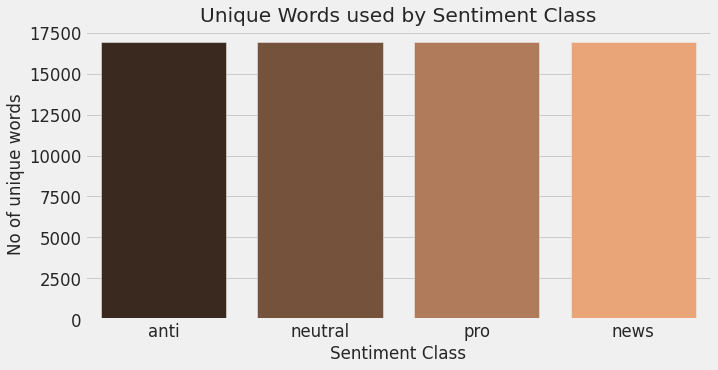

In [ ]:
# create barplot of total unique words by class
sentiment_cat = ['anti', 'neutral', 'pro', 'news']
unique_list = [unique_words(anti),
               unique_words(neutral),
               unique_words(pro),
               unique_words(news)]

plt.figure(figsize=(10, 5))
count = sns.barplot(x=sentiment_cat, y=unique_list, palette="copper")
plt.xlabel('Sentiment Class')
plt.ylabel('No of unique words')
plt.title('Unique Words used by Sentiment Class');

* **Popular hashtags distribution**

>Hashtags are a tool which Twitter uses to orgainize tweets according to topics, news, challenges, etc. This helps in linking together tweets that are suppossedly talking about a common conversation, topic, challenge, etc. 

>We therefore created a hashtag extractor function that allows us to find and count the most twitted hashtags.

In [ ]:
# hashtag extractor function
def hashtag_extract(tweet):   
    hashtags = []         # hashtag array as # words array
    
    for i in tweet:
        #find hashtags and store in the hashtag array
        ht = re.findall(r"#(\w+)", i) 
        hashtags.append(ht)
        
    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags) # count hashtag appearance
    
    #create hashtag dataframe with the columns 'hashtag' and 'count'
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                       'count': list(frequency.values())})
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df

In [ ]:
# Extracting the hashtags from tweets in each category
pro = hashtag_extract(eda_train['message'][eda_train['sentiment'] == 'Pro'])
anti = hashtag_extract(eda_train['message'][eda_train['sentiment'] == 'Anti'])
neutral = hashtag_extract(eda_train['message'][eda_train['sentiment'] == 'Neutral'])
news = hashtag_extract(eda_train['message'][eda_train['sentiment'] == 'News'])

In [ ]:
# View extracted hashtags in the 'Pro' category
pro.head(10)

,hashtag,count
19,climate,187
24,BeforeTheFlood,129
68,climatechange,94
13,ImVotingBecause,62
4,COP22,59
41,ParisAgreement,50
101,ActOnClimate,42
58,Ã,37
50,Trump,34
57,IVotedBecause,33


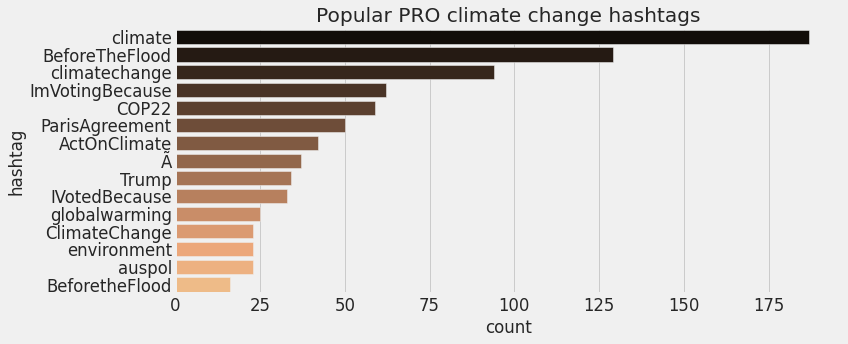

In [ ]:
# Popular PRO climate change hashtags bar plot
#style.use('seaborn-pastel')
plt.figure(figsize=(12, 5))
sns.barplot(data=pro,y=pro['hashtag'], x=pro['count'], palette=("copper"))
plt.title('Popular PRO climate change hashtags')
plt.tight_layout()


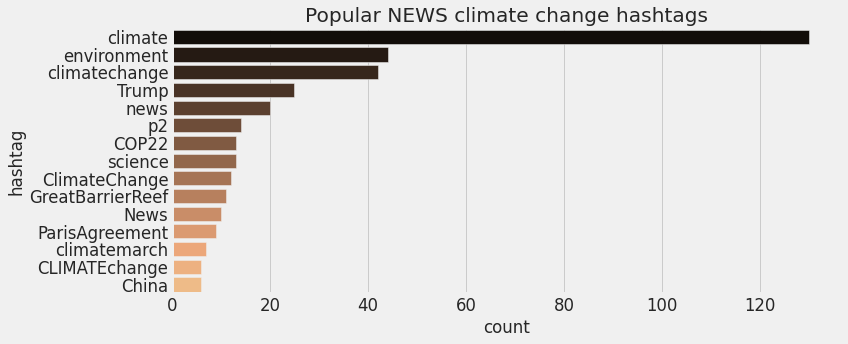

In [ ]:
# Popular NEWS climate change hashtags bar plot
plt.figure(figsize=(12, 5))
sns.barplot(y=news['hashtag'], x=news['count'], palette=("copper"))
plt.title('Popular NEWS climate change hashtags')
plt.tight_layout()

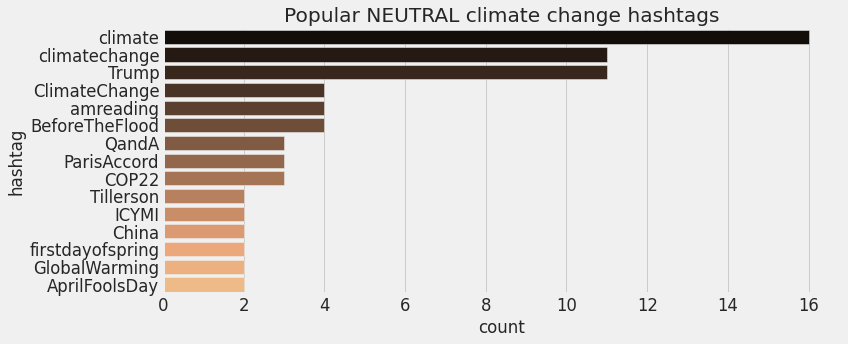

In [ ]:
# Popular NEUTRAL climate change hashtags bar plot
plt.figure(figsize=(12, 5))
sns.barplot(y=neutral['hashtag'], x=neutral['count'], palette=("copper"))
plt.title('Popular NEUTRAL climate change hashtags')
plt.tight_layout()

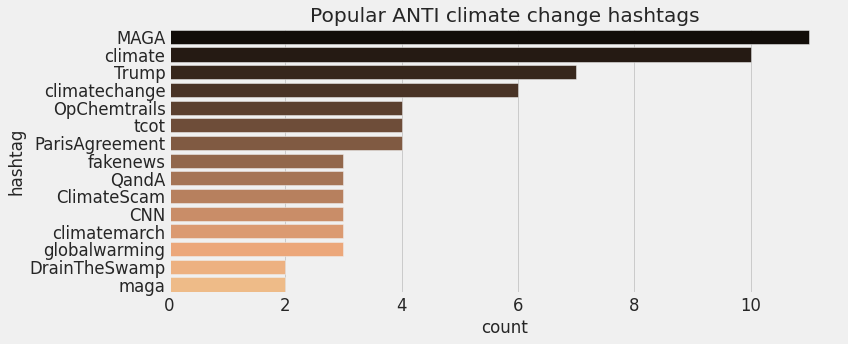

In [ ]:
# Popular ANTI climate change hashtags bar plot
plt.figure(figsize=(12, 5))
sns.barplot(data=anti,y=anti['hashtag'], x=anti['count'], palette=("copper"))
plt.title('Popular ANTI climate change hashtags')
plt.tight_layout()

>Observations:

A total of 2598 hashtags are present in the train corpus.
A total of 1706 unique hashtags are present in the train corpus.
The most common hashtags are centred around climate change & political themes.



*   **People**



In [ ]:
# hashtag extractor function
def mention_extractor(tweet):   
    ment = []         # hashtag array as # words array
    
    for i in tweet['message'].str.lower():
        #find mentions and store in the hashtag array
        ht = re.findall(r'@(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', i) 
        ment.append(ht)
        
    ment = sum(ment, [])
    frequency = nltk.FreqDist(ment) # count hashtag appearance
    
    #create hashtag dataframe with the columns 'hashtag' and 'count'
    ment_df = pd.DataFrame({'Mention': list(frequency.keys()),
                       'count': list(frequency.values())})
    ment_df = ment_df.nlargest(15, columns="count")

    return ment_df

In [ ]:
eda_train

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
15814,Pro,RT @ezlusztig: They took down the material on ...,22001
15815,News,RT @washingtonpost: How climate change could b...,17856
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248
15817,Anti,RT @sara8smiles: Hey liberals the climate chan...,819732


In [ ]:
# extract twitter information
train_df = mention_extractor(eda_train)

In [ ]:
# view train_df
train_df

,Mention,count
7,@stephenschlegel:,307
16,@sensanders:,240
38,@realdonaldtrump,219
75,@leodicaprio,122
27,@berniesanders:,118
313,@cnn:,87
93,@natgeochannel:,84
143,@thehill:,77
470,@climatecentral:,67
74,@sethmacfarlane:,65


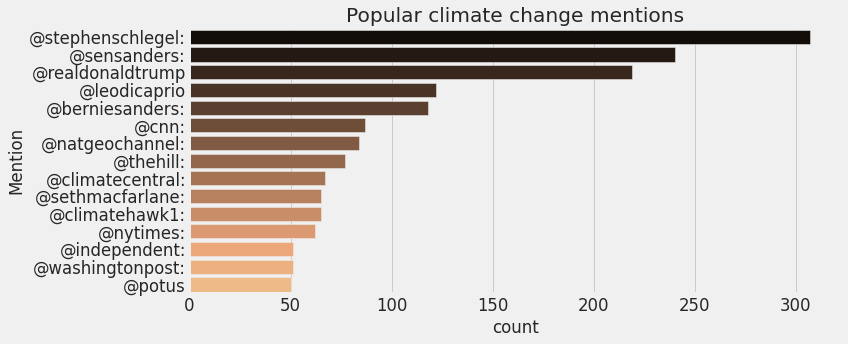

In [ ]:
# Popular climate change mentions bar plot
plt.figure(figsize=(12, 5))
sns.barplot(data=train_df,y=train_df['Mention'], x=train_df['count'], palette=("copper"))
plt.title('Popular climate change mentions')
plt.tight_layout()



> **Mentions and sentiments**



In [ ]:
# Extracting the mentions from tweets in each category
pro =mention_extractor(eda_train[eda_train['sentiment'] == 'Pro'])
anti = mention_extractor(eda_train[eda_train['sentiment'] == 'Anti'])
neutral = mention_extractor(eda_train[eda_train['sentiment'] == 'Neutral'])
news = mention_extractor(eda_train[eda_train['sentiment'] == 'News'])

* ***Pro popular mentions***

In [ ]:
pro

,Mention,count
6,@stephenschlegel:,307
14,@sensanders:,240
50,@realdonaldtrump,153
22,@berniesanders:,118
40,@leodicaprio,109
52,@natgeochannel:,82
39,@sethmacfarlane:,65
691,@climatecentral:,43
126,@natgeochannel,40
406,@cnn:,38


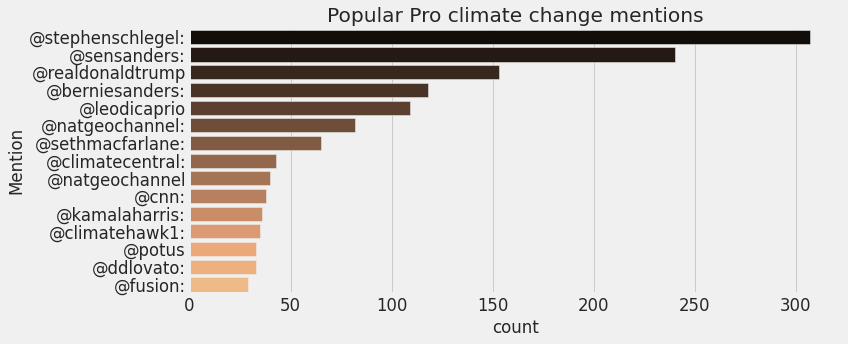

In [ ]:
# Popular Pro climate change mentions bar plot
plt.figure(figsize=(12, 5))
sns.barplot(data=pro,y=pro['Mention'], x=pro['count'], palette=("copper"))
plt.title('Popular Pro climate change mentions')
plt.tight_layout()

* ***Anti popular mentions***

In [ ]:
anti.head()

,Mention,count
22,@realdonaldtrump:,46
2,@stevesgoddard:,40
1,@realdonaldtrump,25
14,@countermoonbat:,15
36,@prisonplanet:,15


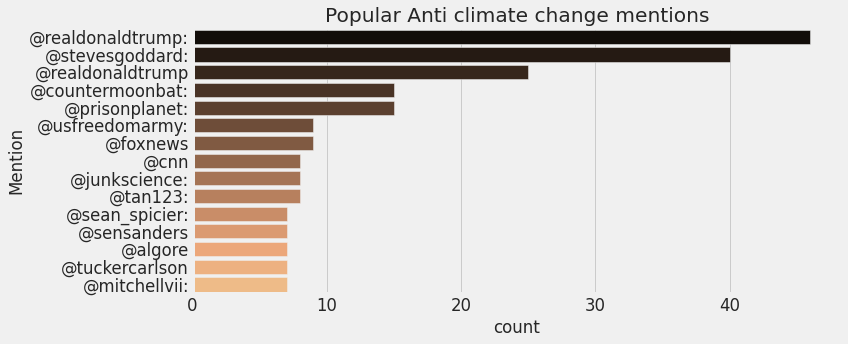

In [ ]:
# Popular Anti climate change mentions bar plot
plt.figure(figsize=(12, 5))
sns.barplot(data=anti,y=anti['Mention'], x=anti['count'], palette=("copper"))
plt.title('Popular Anti climate change mentions')
plt.tight_layout()

* ***News popular mentions***

In [ ]:
news.head()

,Mention,count
26,@thehill:,77
60,@cnn:,49
58,@nytimes:,45
3,@independent:,39
5,@washingtonpost:,38


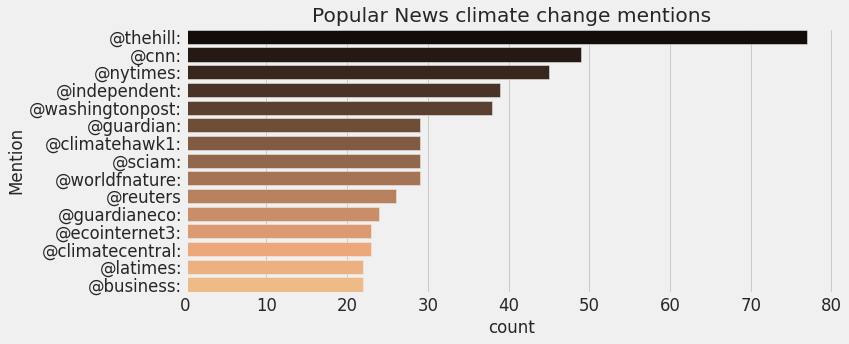

In [ ]:
# Popular News climate change mentions bar plot
plt.figure(figsize=(12, 5))
sns.barplot(data=news,y=news['Mention'], x=news['count'], palette=("copper"))
plt.title('Popular News climate change mentions')
plt.tight_layout()

* ***Neutral popular mentions***

In [ ]:
neutral.head()

,Mention,count
2,@realdonaldtrump,30
82,@ultravlolence:,20
178,@civiljustus:,20
19,@cnn,12
421,@jay_zimmer:,10


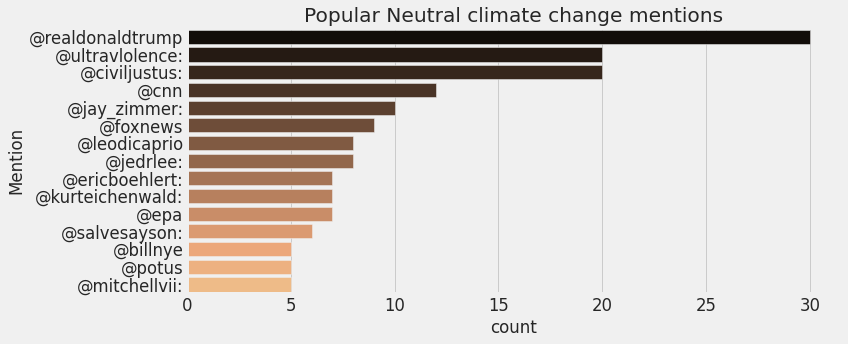

In [ ]:
# Popular Neutral climate change mentions bar plot
plt.figure(figsize=(12, 5))
sns.barplot(data=neutral,y=neutral['Mention'], x=neutral['count'], palette=("copper"))
plt.title('Popular Neutral climate change mentions')
plt.tight_layout()



*   **Cloud visualization for sentiments and mentions**



In [ ]:
eda_train

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
15814,Pro,RT @ezlusztig: They took down the material on ...,22001
15815,News,RT @washingtonpost: How climate change could b...,17856
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248
15817,Anti,RT @sara8smiles: Hey liberals the climate chan...,819732


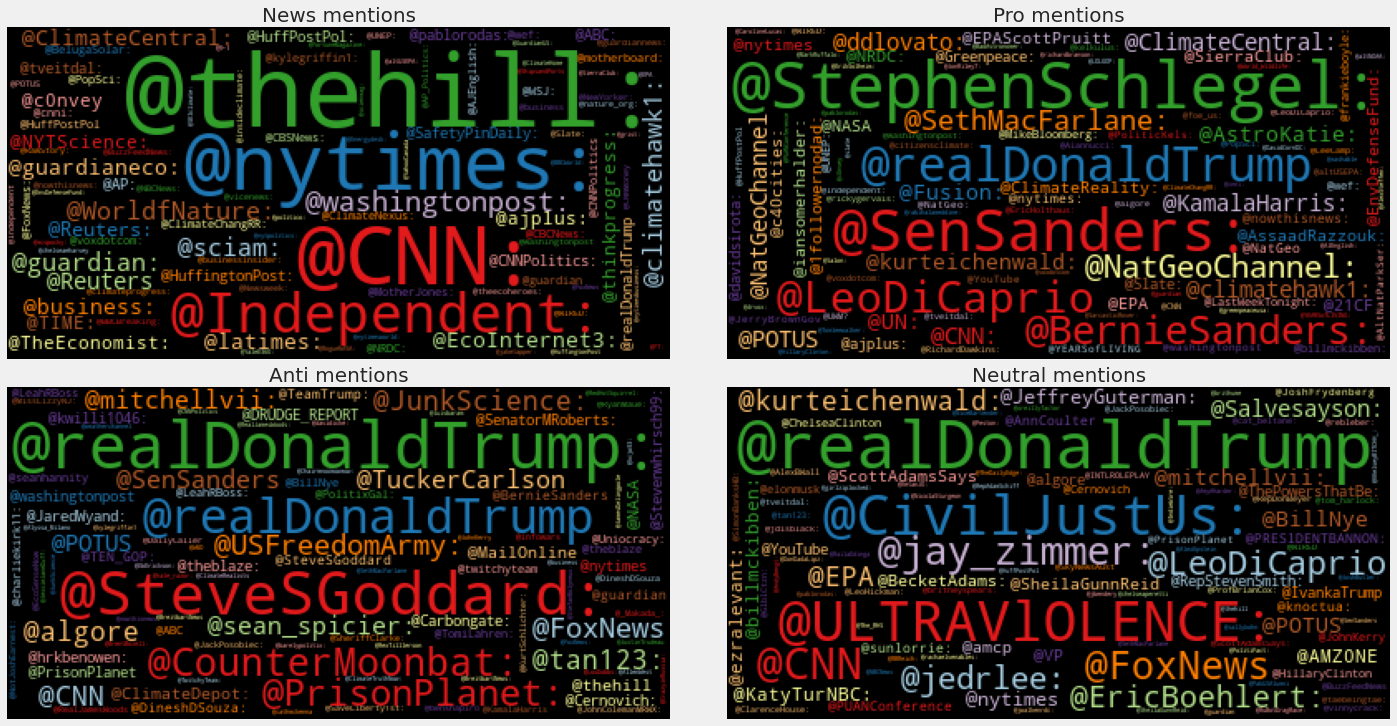

In [ ]:
#Define the different categories in the cleaned train
News = eda_train['message'][eda_train['sentiment'] == 'News']
Pro = eda_train['message'][eda_train['sentiment'] == 'Pro']
Neutral = eda_train['message'][eda_train['sentiment'] == 'Neutral']
Anti = eda_train['message'][eda_train['sentiment'] == 'Anti']

News = WordCloud(
    background_color='black',
    max_words=100,
    max_font_size=60,
    random_state=1,
    regexp='@(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',
    collocations=False,
    colormap ='Paired',
    normalize_plurals=False   
).generate(' '.join(News))


Pro = WordCloud(
    background_color='black',
    max_words=100,
    max_font_size=60,
    random_state=1,
    regexp='@(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',
    collocations=False,
    colormap ='Paired',
    normalize_plurals=False
).generate(' '.join(Pro))



Neutral = WordCloud(
    background_color='black',
    max_words=100,
    max_font_size=60,
    random_state=1,
    regexp='@(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',
    collocations=False,
    colormap='Paired',
    normalize_plurals=False
).generate(' '.join(Neutral))


Anti = WordCloud(
    background_color='black',
    max_words=100,
    max_font_size=60,
    random_state=1,
    regexp='@(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',
    collocations=False,
    colormap ='Paired',
    normalize_plurals=False
).generate(' '.join(Anti))


fig, axs = plt.subplots(2, 2, figsize = (20, 10))
fig.tight_layout(pad = 0)

axs[0, 0].imshow(News)
axs[0, 0].set_title('News mentions', fontsize = 20)
axs[0, 0].axis('off')

axs[0, 1].imshow(Pro)
axs[0, 1].set_title('Pro mentions', fontsize = 20)
axs[0, 1].axis('off')


axs[1, 0].imshow(Anti)
axs[1, 0].set_title('Anti mentions', fontsize = 20)
axs[1, 0].axis('off')

axs[1, 1].imshow(Neutral)
axs[1, 1].set_title('Neutral mentions', fontsize = 20)
axs[1, 1].axis('off')

plt.savefig('joint_cloud.png')

#**3. Machine Learning**



> The cleaned data was fitted in a TFiD and CountVector pipeline with a unigram and bigram analysis and passed through five models and compared their performances. The best performing model was then hyperparamatised to improve its performance. In this way we were able to achieve a well optimized performing model.



##**3.1. Train-test split**

In [ ]:
# Create features and label
X = train['message'].values
y = train['sentiment'].values

In [ ]:
# split train_data to create a train data and test data to validate models
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=.05,
                                                  random_state=42
                                                  )

##**3.2. Train Models**



*  **Vectorizers**





In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Define multiple vectorizers to test and only the best will be chosen
vectorizer_dict = {'CV_1': CountVectorizer(),'TF_1': TfidfVectorizer()}



> **Models**



In [ ]:
# model dictionary
# list of all models to be ran and only best performing will be chosen
model_dict = {'Logistic Regression': LogisticRegression(),
              'Naive Bayes': MultinomialNB(),
              'LinearSVM': SGDClassifier(),
              'Decision Tree': DecisionTreeClassifier(),
              'LinearSVC': LinearSVC(),
              'SVC': SVC()
              }

> **Run Models**

In [ ]:
# Run each and every classifier for each and every vectorizer
from collections import defaultdict
classifier_results_dict = defaultdict(list)
for vec_name, vectorizer in vectorizer_dict.items():
    # trainsform x-train and x-val
    X_train_v = vectorizer.fit_transform(X_train)
    X_test_v = vectorizer.transform(X_val)
    print(vec_name)      # helps keep track of run progress

    for mod_name, model in model_dict.items():

        # Logging the execution time for each model
        start_time = time.time()

        model.fit(X_train_v, y_train)
        y_pred_v = model.predict(X_test_v)

        run_time = time.time()-start_time

        precision_v = round(100*precision_score(y_val, y_pred_v,
                            average='weighted'), 4)
        recall_v = round(100*recall_score(y_val, y_pred_v,
                         average='weighted'), 4)
        f1_v = round(2*(precision_v*recall_v) / (precision_v+recall_v), 4)

        classifier_results_dict['Vectorizer Type'].append(vec_name)
        classifier_results_dict['Model Name'].append(mod_name)
        classifier_results_dict[('Precision')].append(precision_v)
        classifier_results_dict[('Recall')].append(recall_v)
        classifier_results_dict[('F1-score')].append(f1_v)
        classifier_results_dict[('Execution Time')].append(run_time)


CV_1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


TF_1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#**4. Model Evaluation**

##**4.1. Model Performance**

> After running the models, a comparison table to compare performance of the different model when different vectorizer types are used. The table below contains the prescision, recall and F1-score metrics. The important score considered here is the F1-score as it is the true reflection of the model's performance.

In [ ]:
# Convert the clf results dictionary in to a model performance table
classifier_results_df = pd.DataFrame(classifier_results_dict)

# Checking result
# And sort table by the F1-score
classifier_results_df.sort_values(by='F1-score',
                                  ascending=False).reset_index(drop=True)

,Vectorizer Type,Model Name,Precision,Recall,F1-score,Execution Time
0,TF_1,SVC,76.8198,75.2212,76.0121,47.981690
1,CV_1,SVC,75.2753,74.7155,74.9944,36.175134
2,TF_1,Logistic Regression,73.8359,74.3363,74.0853,3.003285
3,TF_1,LinearSVM,73.9592,74.2099,74.0843,0.143814
4,CV_1,Logistic Regression,72.2507,73.1985,72.7215,3.143149
5,TF_1,LinearSVC,71.7736,72.8192,72.2926,0.250359
6,CV_1,LinearSVM,71.9078,72.4399,72.1729,0.296345
7,CV_1,LinearSVC,71.9252,72.0607,71.9929,2.206329
8,TF_1,Naive Bayes,77.2010,66.6245,71.5239,0.009903
9,CV_1,Naive Bayes,71.5482,71.3021,71.4249,0.018811


##**4.2. Model Selection**

* **Models score comparison**

> As shown in the table above, based on the f1-score, the SVC, with an F1-Score of approximately 76%, when a Tfid vectorizer is used, performed better compared to all the models, followed by again the SVC when CV vectorizer was used.

>Coming third, at approximately 74%, is the Logistic Regression with the Tfid vectorizer.

>The LinearSVM, Logistic Regression (when CV vectoriser is used, Linear SVC, Naive Bayes performed around the range 73.3% to 71.4% with all vectorizers used.

>However, the Decision Tree poorly performed with both vectorizers with an F1-score of 65% and 64.5% approximately.

>Below is the graphical visualization of the model performances. As one can, the models all performed around the range of 71-76 percent, with an exception of the Decision tree poorly performing at 65%, approximately.

In [ ]:
# Plot F1 model scores to compare model and vectorizer performances
import plotly.express as px
fig = px.bar(classifier_results_df, x="Model Name", y="F1-score", color='Vectorizer Type',
             barmode='group', height=400)
fig.show()

> The faster the speed, the better. The speed a model is able to process data and produce results is crucial, so much so that sometimes one might want to compromise on the F1-score for a faster model, especially when the score is too compromised.

In [ ]:
# Plot execution time vs model to view model speeds
import plotly.express as px
fig = px.bar(classifier_results_df, x="Model Name", y="Execution Time", color='Vectorizer Type',
             barmode='group', height=400)
fig.show()

> Naive Bayes process speed is the fastest, while it produced an underperforming average F1-score. 

>The Logistic Regression and the LinearSVC is fast and yet produces well above average F1-scores, with a very less margin from the best score. In loose terms, the two models are able to effortlessly produce quality performance, even though its F1-scores were not the best compared to the best score model.

> Whereas the SVC with the best f1-score takes a long time to produce the highest model. Loosely meaning it is trading processing speed over accuracy.

>Therefore, with this realization, overall, the Logistic regression, when the TF1 vectorizer type is used, performed better than all the models with an F1-score of approximately 74% and execution of 3 seconds. Even though the SVC, Tfid, produces better F1 results by a margin of 2%, the SVc is approx. 15 times slower than Logistic Regression, when using the Tfid vectorizer type.

>However, with the aim of getting the best f1-score, we will select the SVC, Tfid vectorizer, as our best model.

* **Hyperparameter tuning of best model**

> In an attempt of improving the best model results, we perform a hyperparameter tuning. This well allow us to optimise the performance of the selected best model. This is done through an automated trial and test method that fits all possible parameter combinations from a list of abitrary chosen parameters and picks the parameters that were able to produce the best score.

In [ ]:
# Create feature set and target 
X = train['message'].values
y = train['sentiment'].values

In [ ]:
# Split train_data into train and test
# this time using most of the data for training
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=.01,
                                                  random_state=42
                                                  )

In [ ]:
# Pick the best performing vectorizer
vectorizer = TfidfVectorizer(min_df = 1, max_df = 0.9, ngram_range = (1, 2))

# Create a pipeline
Tfd_SVC_pipe = Pipeline([('vectorizer', vectorizer), ('SVC', SVC())]) 

In [ ]:
# Check parameters of the pipeline
Tfd_SVC_pipe.get_params()

{'SVC': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'SVC__C': 1.0,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': None,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False,
 'memory': None,
 'steps': [('vectorizer',
   TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                   dtype=<class 'numpy.float64'>, encoding='utf-8',
                   input='content', lowercase=True, max_df=0.9, max_features=None,
                   min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                   smoo

Here, a set of abitrary parameters is chosen.

In [ ]:
# Create an abitrary parameter set of the pipeline
# Set kernel to linear and rbf
# C 0.25 and 1.0
# gamma 1 and 2
parameters = {'SVC__kernel':('linear', 'rbf'),
              'SVC__C':(0.25,1.0),
              'SVC__gamma': (1,2)
              }

A GridSearch fit will iterate through all the possible outcomes and pick that of a parameter comn=bination that produces the best score.

In [ ]:
# create a cross-validation grisearch
# to find the best parameter combination
# and define it as clf
clf = GridSearchCV(Tfd_SVC_pipe, parameters)
# fit clf
clf.fit(X_train,y_train)
# Check best score and print out the best parameter combination
print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)


Best Score:  0.7286079182630907
Best Params:  {'SVC__C': 1.0, 'SVC__gamma': 1, 'SVC__kernel': 'linear'}


In [ ]:
# Perform a prediction on the validate set to check performance
y_pred = clf.predict(X_val)

In [ ]:
# Print out a metric report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.60      0.75        10
           0       0.69      0.33      0.45        27
           1       0.77      0.87      0.82        92
           2       0.69      0.83      0.76        30

    accuracy                           0.75       159
   macro avg       0.79      0.66      0.69       159
weighted avg       0.76      0.75      0.74       159



#**5. Results and Submission**

In [ ]:
# Perform a prediction on the unseen test data
test['sentiment'] = clf.predict(test['message'])

In [ ]:
# Create a submission csv 
# first by dropping the 'message' column
test.drop('message', axis = 1)

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1
...,...,...
10541,895714,1
10542,875167,1
10543,78329,2
10544,867455,0


In [ ]:
# Now create the submission csv with the 'tweetid' and 'sentiment' columns
test[['tweetid','sentiment']].to_csv('submissionmpho.csv', index=False)

In [ ]:
# Read submission csv
submission = pd.read_csv('submissionmpho.csv')

In [ ]:
# View submission file
submission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


#**6. Conclusion**

The SVC model performed better compared to all the models tested with an F1-Score of approximately 76%, when a Tfid vectorizer is used. After performing a hyperparameter tuning of the model, the F1-score rose by a very small marging of 0.5%.

Naive Bayes process speed is the fastest, while it produced an underperforming average F1-score.

The Logistic Regression and the LinearSVC is considerably fast and yet produces well above average F1-scores, with a very less margin from the best score. In loose terms, the two models are able to effortlessly produce quality performance, even though its F1-scores were not the best compared to the best score model.

Whereas the SVC with the best f1-score takes a long time to produce the highest model. Loosely meaning it is trading processing speed over accuracy.

Therefore, with this realization, overall, the Logistic regression, when the TF1 vectorizer type is used, performed better than all the models with an F1-score of approximately 74% and execution of 3 seconds. Even though the SVC, Tfid, produces better F1 results by a margin of 2%, the SVc is approx. 15 times slower than Logistic Regression, when using the Tfid vectorizer type.

However, with the aim of getting the best f1-score, we will select the SVC, Tfid vectorizer, as our best model.

#**References**

[1] https://towardsdatascience.com/classifying-climate-change-tweets-8245450a5e96

[2] https://towardsdatascience.com/6-nlp-techniques-every-data-scientist-should-know-7cdea012e5c3

[3] https://www.kdnuggets.com/2020/01/intro-guide-nlp-data-scientists.html